## Tasks:


### 1. Data Loading and Initial Exploration:

- Load the dataset into a Pandas DataFrame.
- Display basic information about the dataset.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

# Load the Modified Heart dataset

df = pd.read_csv('C:/Users/fadi-/Python_OP2/Final Assignment/modified_heart_dataset_supervised.csv')


In [2]:
df

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,GeneticMarker1,GeneticMarker2,BodyWeightCategory,HeartDisease
0,40,M,ATA,141,289,0,Normal,173,N,0.0,Up,0.046501,11560,Normal,0
1,49,F,NAP,158,175,0,Normal,151,N,1.0,Flat,0.619699,8575,Overweight,1
2,37,M,ATA,135,285,0,ST,97,N,0.0,Up,0.561993,10545,Overweight,0
3,48,F,ASY,140,214,0,Normal,112,Y,1.5,Flat,0.345920,10272,Obese,1
4,54,M,NAP,149,192,0,Normal,124,N,0.0,Up,0.315190,10368,Underweight,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,M,TA,106,268,0,Normal,135,N,1.2,Flat,0.125356,12060,Normal,1
914,68,M,ASY,142,190,1,Normal,141,N,3.4,Flat,0.336965,12920,Overweight,1
915,57,M,ASY,135,128,0,Normal,118,Y,1.2,Flat,0.999544,7296,Underweight,1
916,57,F,ATA,128,236,0,LVH,172,N,0.0,Flat,0.405751,13452,Obese,1


In [3]:
#check for NaN values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Age                 918 non-null    int64  
 1   Sex                 918 non-null    object 
 2   ChestPainType       918 non-null    object 
 3   RestingBP           918 non-null    int64  
 4   Cholesterol         918 non-null    int64  
 5   FastingBS           918 non-null    int64  
 6   RestingECG          918 non-null    object 
 7   MaxHR               918 non-null    int64  
 8   ExerciseAngina      918 non-null    object 
 9   Oldpeak             918 non-null    float64
 10  ST_Slope            918 non-null    object 
 11  GeneticMarker1      918 non-null    float64
 12  GeneticMarker2      918 non-null    int64  
 13  BodyWeightCategory  918 non-null    object 
 14  HeartDisease        918 non-null    int64  
dtypes: float64(2), int64(7), object(6)
memory usage: 107.7+ K

In [4]:
# Another check for NaN values
df.isnull().sum()

Age                   0
Sex                   0
ChestPainType         0
RestingBP             0
Cholesterol           0
FastingBS             0
RestingECG            0
MaxHR                 0
ExerciseAngina        0
Oldpeak               0
ST_Slope              0
GeneticMarker1        0
GeneticMarker2        0
BodyWeightCategory    0
HeartDisease          0
dtype: int64

In [5]:
#check for duplicates
df.describe()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,GeneticMarker1,GeneticMarker2,HeartDisease
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,132.239651,198.787582,0.233115,136.643791,0.887364,0.508888,10540.282135,0.553377
std,9.432617,18.804257,109.529397,0.423046,25.662700,1.066570,0.291353,6242.988493,0.497414
min,28.000000,1.000000,-5.000000,0.000000,56.000000,-2.600000,0.000188,-365.000000,0.000000
25%,47.000000,120.000000,173.000000,0.000000,118.000000,0.000000,0.254569,7724.750000,0.000000
50%,54.000000,131.000000,223.000000,0.000000,137.000000,0.600000,0.526046,11439.000000,1.000000
75%,60.000000,143.000000,267.000000,0.000000,156.000000,1.500000,0.761030,14664.750000,1.000000
max,77.000000,201.000000,607.000000,1.000000,201.000000,6.200000,0.999714,37520.000000,1.000000


### 2. Data Preparation 

- Visually identify outliers in the data set
- Use IQR method to specify & delete the outliers

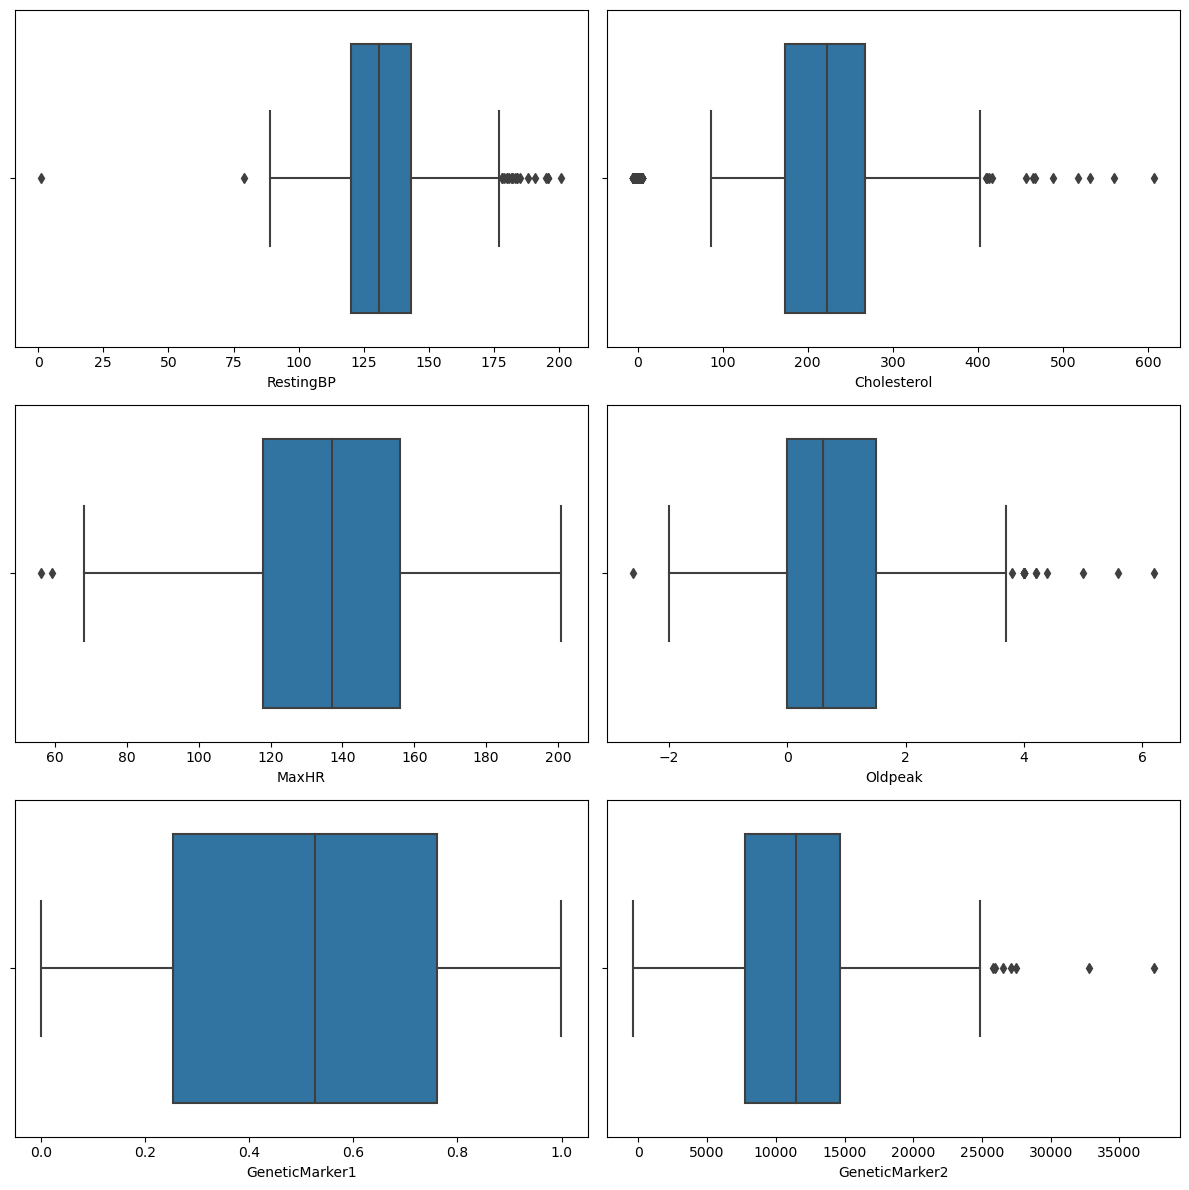

In [6]:
#First identify outliers using boxplots
fig, ax = plt.subplots(nrows=3, ncols=2, figsize=(12,12))

#plot 1
sns.boxplot(x='RestingBP', data=df, ax=ax[0, 0])

# Plot 2
sns.boxplot(x='Cholesterol', data=df, ax=ax[0, 1])

# Plot 3
sns.boxplot(x='MaxHR', data=df, ax=ax[1, 0])

# Plot 4
sns.boxplot(x='Oldpeak', data=df, ax=ax[1,1])

#plot 5
sns.boxplot(x='GeneticMarker1', data=df, ax=ax[2, 0])

#plot 6
sns.boxplot(x='GeneticMarker2', data=df, ax=ax[2, 1])

plt.tight_layout()
plt.show()

#Every column, expect GeneticMarker1, has outliers

### 2. IQR Method

- Use the IQR method to specify the outliers.
- Use the same method for the RestingBP, Cholesterol, MaxHR, GeneticMarker2

In [7]:
#Use IQR Method on the RestingBP
#find the q1, q3 and iqr (blue box)
q1 = df['RestingBP'].quantile(0.25)
q3= df['RestingBP'].quantile(0.75)
iqr = q3-q1
#find the limits, every data outside of these limits are considered outliers
upper_limit = q3 + (1.5 * iqr)
lower_limit = q1 - (1.5 * iqr)
lower_limit, upper_limit

(85.5, 177.5)

In [8]:
#find the outliers
df.loc[(df['RestingBP'] > upper_limit) | (df['RestingBP'] < lower_limit)]

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,GeneticMarker1,GeneticMarker2,BodyWeightCategory,HeartDisease
109,39,M,ATA,191,239,0,Normal,101,N,0.0,Up,0.117644,9321,Underweight,0
123,58,F,ATA,179,397,0,Normal,111,Y,1.0,Flat,0.029364,23026,Underweight,1
189,53,M,ASY,182,280,0,ST,123,Y,1.5,Flat,0.412761,14840,Underweight,1
241,54,M,ASY,195,193,0,Normal,145,Y,2.0,Flat,0.032646,10422,Underweight,1
274,45,F,ATA,182,299,0,Normal,178,N,0.0,Up,0.238857,13455,Obese,0
275,59,M,NAP,178,210,0,Normal,98,N,0.0,Up,0.469642,12390,Normal,0
278,57,F,ASY,178,348,0,ST,127,Y,0.8,Flat,0.622520,19836,Overweight,0
314,53,M,ASY,79,1,0,Normal,145,Y,2.0,Down,0.718429,53,Overweight,0
365,64,F,ASY,196,-1,0,Normal,140,Y,1.0,Flat,0.542534,-64,Normal,1
372,63,M,ASY,183,3,0,Normal,103,Y,0.0,Up,0.759351,189,Overweight,1


In [9]:
#trim the data, delete the outliers
df = df.loc[(df['RestingBP'] < upper_limit) & (df['RestingBP'] > lower_limit)]
df

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,GeneticMarker1,GeneticMarker2,BodyWeightCategory,HeartDisease
0,40,M,ATA,141,289,0,Normal,173,N,0.0,Up,0.046501,11560,Normal,0
1,49,F,NAP,158,175,0,Normal,151,N,1.0,Flat,0.619699,8575,Overweight,1
2,37,M,ATA,135,285,0,ST,97,N,0.0,Up,0.561993,10545,Overweight,0
3,48,F,ASY,140,214,0,Normal,112,Y,1.5,Flat,0.345920,10272,Obese,1
4,54,M,NAP,149,192,0,Normal,124,N,0.0,Up,0.315190,10368,Underweight,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,M,TA,106,268,0,Normal,135,N,1.2,Flat,0.125356,12060,Normal,1
914,68,M,ASY,142,190,1,Normal,141,N,3.4,Flat,0.336965,12920,Overweight,1
915,57,M,ASY,135,128,0,Normal,118,Y,1.2,Flat,0.999544,7296,Underweight,1
916,57,F,ATA,128,236,0,LVH,172,N,0.0,Flat,0.405751,13452,Obese,1


In [10]:
#Use IQR Method on Cholesterol
#find the q1, q3 and iqr (blue box)
q1 = df['Cholesterol'].quantile(0.25)
q3= df['Cholesterol'].quantile(0.75)
iqr = q3-q1
q1, q3, iqr

##find the limits, every data outside of these limits are considered outliers
upper_limit = q3 + (1.5 * iqr)
lower_limit = q1 - (1.5 * iqr)
lower_limit, upper_limit

(36.0, 404.0)

In [11]:
#find the outliers
df.loc[(df['Cholesterol'] > upper_limit) | (df['Cholesterol'] < lower_limit)]

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,GeneticMarker1,GeneticMarker2,BodyWeightCategory,HeartDisease
28,53,F,ATA,108,465,0,Normal,127,N,0.0,Up,0.417990,24645,Obese,0
30,53,M,NAP,150,518,0,Normal,126,N,0.0,Flat,0.683754,27454,Normal,1
69,44,M,ASY,146,411,0,Normal,167,N,0.0,Up,0.557981,18084,Underweight,0
76,32,M,ASY,117,532,0,Normal,128,N,0.0,Flat,0.371933,17024,Obese,1
103,40,M,ASY,123,467,1,Normal,149,Y,1.0,Flat,0.732635,18680,Obese,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
536,62,M,NAP,128,-4,1,ST,117,Y,1.2,Flat,0.280334,-248,Obese,1
616,67,F,NAP,110,560,0,LVH,155,N,1.6,Flat,0.116023,37520,Overweight,0
624,63,F,ASY,149,410,0,LVH,156,N,4.0,Flat,0.875511,25830,Obese,1
667,65,F,NAP,135,417,1,LVH,160,N,0.8,Up,0.823309,27105,Underweight,0


In [12]:
#trim the data, delete the outliers
df = df.loc[(df['Cholesterol'] < upper_limit) & (df['Cholesterol'] > lower_limit)]
df

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,GeneticMarker1,GeneticMarker2,BodyWeightCategory,HeartDisease
0,40,M,ATA,141,289,0,Normal,173,N,0.0,Up,0.046501,11560,Normal,0
1,49,F,NAP,158,175,0,Normal,151,N,1.0,Flat,0.619699,8575,Overweight,1
2,37,M,ATA,135,285,0,ST,97,N,0.0,Up,0.561993,10545,Overweight,0
3,48,F,ASY,140,214,0,Normal,112,Y,1.5,Flat,0.345920,10272,Obese,1
4,54,M,NAP,149,192,0,Normal,124,N,0.0,Up,0.315190,10368,Underweight,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,M,TA,106,268,0,Normal,135,N,1.2,Flat,0.125356,12060,Normal,1
914,68,M,ASY,142,190,1,Normal,141,N,3.4,Flat,0.336965,12920,Overweight,1
915,57,M,ASY,135,128,0,Normal,118,Y,1.2,Flat,0.999544,7296,Underweight,1
916,57,F,ATA,128,236,0,LVH,172,N,0.0,Flat,0.405751,13452,Obese,1


In [13]:
#Use IQR Method on Oldpeak
#find the q1, q3 and iqr (blue box)
q1 = df['Oldpeak'].quantile(0.25)
q3= df['Oldpeak'].quantile(0.75)
iqr = q3-q1
q1, q3, iqr

(0.0, 1.5, 1.5)

In [14]:
#find the limits, every data outside of these limits are considered outliers
lower_limit = q1 - (1.5 * iqr)
lower_limit, upper_limit

(-2.25, 3.75)

In [15]:
#find the outliers
df.loc[(df['Oldpeak'] > upper_limit) | (df['Oldpeak'] < lower_limit)]

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,GeneticMarker1,GeneticMarker2,BodyWeightCategory,HeartDisease
68,52,M,ASY,164,243,0,ST,86,Y,4.0,Flat,0.750730,12636,Obese,1
166,50,M,ASY,142,230,0,ST,139,Y,5.0,Flat,0.077078,11500,Underweight,1
500,65,M,ASY,132,250,0,Normal,138,Y,4.0,Down,0.311899,16250,Underweight,1
521,61,M,ASY,117,283,0,ST,138,Y,4.0,Down,0.089812,17263,Normal,1
537,74,M,ASY,148,263,1,ST,128,Y,4.0,Down,0.687406,19462,Underweight,1
559,64,M,ASY,133,271,0,Normal,103,Y,4.0,Down,0.152330,17344,Obese,1
702,59,M,TA,177,265,0,LVH,142,N,4.2,Down,0.641860,15635,Underweight,0
771,55,M,ASY,144,216,0,Normal,111,Y,5.6,Down,0.136999,11880,Obese,1
775,38,M,TA,115,235,0,Normal,181,Y,3.8,Flat,0.659114,8930,Underweight,1
791,51,M,ASY,140,296,0,Normal,122,Y,4.2,Flat,0.355041,15096,Normal,1


In [16]:
#trim the data, delete the outliers
df = df.loc[(df['Oldpeak'] < upper_limit) & (df['Oldpeak'] > lower_limit)]
df

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,GeneticMarker1,GeneticMarker2,BodyWeightCategory,HeartDisease
0,40,M,ATA,141,289,0,Normal,173,N,0.0,Up,0.046501,11560,Normal,0
1,49,F,NAP,158,175,0,Normal,151,N,1.0,Flat,0.619699,8575,Overweight,1
2,37,M,ATA,135,285,0,ST,97,N,0.0,Up,0.561993,10545,Overweight,0
3,48,F,ASY,140,214,0,Normal,112,Y,1.5,Flat,0.345920,10272,Obese,1
4,54,M,NAP,149,192,0,Normal,124,N,0.0,Up,0.315190,10368,Underweight,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,M,TA,106,268,0,Normal,135,N,1.2,Flat,0.125356,12060,Normal,1
914,68,M,ASY,142,190,1,Normal,141,N,3.4,Flat,0.336965,12920,Overweight,1
915,57,M,ASY,135,128,0,Normal,118,Y,1.2,Flat,0.999544,7296,Underweight,1
916,57,F,ATA,128,236,0,LVH,172,N,0.0,Flat,0.405751,13452,Obese,1


In [17]:
#Use IQR Method on MaxHR
#find the q1, q3 and iqr (blue box)
q1 = df['MaxHR'].quantile(0.25)
q3= df['MaxHR'].quantile(0.75)
iqr = q3-q1
q1, q3, iqr

#find the limits, every data outside of these limits are considered outliers
upper_limit = q3 + (1.5 * iqr)
lower_limit = q1 - (1.5 * iqr)
lower_limit, upper_limit

(66.5, 214.5)

In [18]:
##find the outliers
df.loc[(df['MaxHR'] > upper_limit) | (df['MaxHR'] < lower_limit)]

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,GeneticMarker1,GeneticMarker2,BodyWeightCategory,HeartDisease


In [19]:
#trim the data, delete the outliers
df = df.loc[(df['MaxHR'] < upper_limit) & (df['MaxHR'] > lower_limit)]
df

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,GeneticMarker1,GeneticMarker2,BodyWeightCategory,HeartDisease
0,40,M,ATA,141,289,0,Normal,173,N,0.0,Up,0.046501,11560,Normal,0
1,49,F,NAP,158,175,0,Normal,151,N,1.0,Flat,0.619699,8575,Overweight,1
2,37,M,ATA,135,285,0,ST,97,N,0.0,Up,0.561993,10545,Overweight,0
3,48,F,ASY,140,214,0,Normal,112,Y,1.5,Flat,0.345920,10272,Obese,1
4,54,M,NAP,149,192,0,Normal,124,N,0.0,Up,0.315190,10368,Underweight,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,M,TA,106,268,0,Normal,135,N,1.2,Flat,0.125356,12060,Normal,1
914,68,M,ASY,142,190,1,Normal,141,N,3.4,Flat,0.336965,12920,Overweight,1
915,57,M,ASY,135,128,0,Normal,118,Y,1.2,Flat,0.999544,7296,Underweight,1
916,57,F,ATA,128,236,0,LVH,172,N,0.0,Flat,0.405751,13452,Obese,1


In [20]:
#Use IQR Method on GeneticMarker2
#find the q1, q3 and iqr (blue box)
q1 = df['GeneticMarker2'].quantile(0.25)
q3= df['GeneticMarker2'].quantile(0.75)
iqr = q3-q1
q1, q3, iqr

##find the limits, every data outside of these limits are considered outliers
upper_limit = q3 + (1.5 * iqr)
lower_limit = q1 - (1.5 * iqr)
lower_limit, upper_limit

(2716.75, 22510.75)

In [21]:
##find the outliers
df.loc[(df['GeneticMarker2'] > upper_limit) | (df['GeneticMarker2'] < lower_limit)]

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,GeneticMarker1,GeneticMarker2,BodyWeightCategory,HeartDisease
498,67,M,ASY,164,387,1,ST,128,Y,0.0,Flat,0.298435,25929,Obese,1
556,75,M,ASY,165,307,1,Normal,112,Y,2.0,Down,0.863401,23025,Underweight,0
577,67,M,ASY,141,371,0,Normal,109,Y,1.9,Flat,0.526278,24857,Overweight,1
603,74,M,ASY,156,309,0,Normal,116,Y,1.5,Down,0.082715,22866,Obese,1
613,58,M,ASY,142,389,1,LVH,135,N,0.3,Up,0.377314,22562,Obese,0
738,65,F,NAP,155,365,0,LVH,152,N,0.8,Up,0.527265,23725,Underweight,0
803,62,F,ASY,137,392,0,LVH,155,N,1.2,Flat,0.960168,24304,Underweight,0
814,77,M,ASY,128,309,0,LVH,163,Y,0.0,Up,0.177888,23793,Underweight,1


In [22]:
#trim the data, delete the outliers
df = df.loc[(df['GeneticMarker2'] < upper_limit) & (df['GeneticMarker2'] > lower_limit)]
df

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,GeneticMarker1,GeneticMarker2,BodyWeightCategory,HeartDisease
0,40,M,ATA,141,289,0,Normal,173,N,0.0,Up,0.046501,11560,Normal,0
1,49,F,NAP,158,175,0,Normal,151,N,1.0,Flat,0.619699,8575,Overweight,1
2,37,M,ATA,135,285,0,ST,97,N,0.0,Up,0.561993,10545,Overweight,0
3,48,F,ASY,140,214,0,Normal,112,Y,1.5,Flat,0.345920,10272,Obese,1
4,54,M,NAP,149,192,0,Normal,124,N,0.0,Up,0.315190,10368,Underweight,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,M,TA,106,268,0,Normal,135,N,1.2,Flat,0.125356,12060,Normal,1
914,68,M,ASY,142,190,1,Normal,141,N,3.4,Flat,0.336965,12920,Overweight,1
915,57,M,ASY,135,128,0,Normal,118,Y,1.2,Flat,0.999544,7296,Underweight,1
916,57,F,ATA,128,236,0,LVH,172,N,0.0,Flat,0.405751,13452,Obese,1


### 3. Exploratory Data Analysis (EDA):

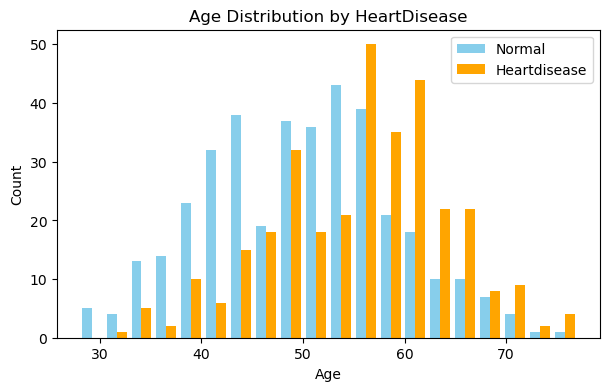

In [23]:
# Explore age distribution by HeartDisease
# As seen in the histogram  the chances of having heart disease go up after the age of 55
plt.figure(figsize=(7, 4))

plt.hist([df[df["HeartDisease"] == 0]["Age"], df[df["HeartDisease"] == 1]["Age"]], bins=20, color=["skyblue", "orange"], label=["Normal", "Heartdisease"])

plt.xlabel('Age')
plt.ylabel('Count')
plt.title('Age Distribution by HeartDisease')
plt.legend()

plt.show()

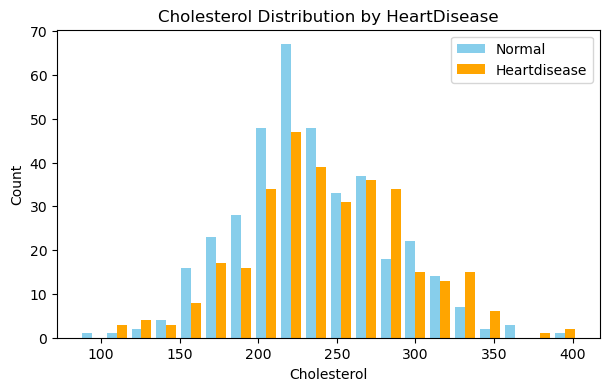

In [24]:
# Explore cholesterol distribution by HeartDisease
# I don't know what is happening
plt.figure(figsize=(7, 4))

plt.hist([df[df["HeartDisease"] == 0]["Cholesterol"], df[df["HeartDisease"] == 1]["Cholesterol"]], bins=20, color=["skyblue", "orange"], label=["Normal", "Heartdisease"])

plt.xlabel('Cholesterol')
plt.ylabel('Count')
plt.title('Cholesterol Distribution by HeartDisease')
plt.legend()

plt.show()

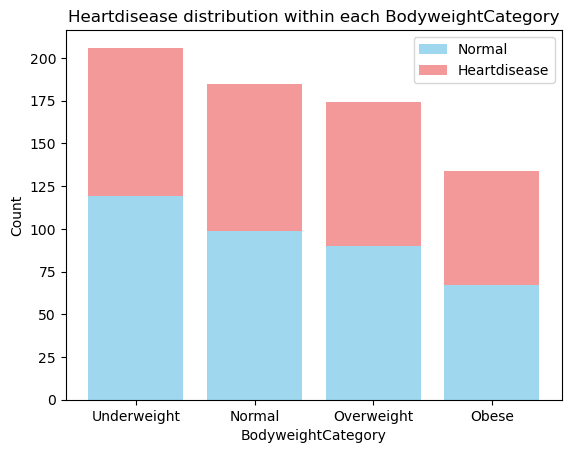

In [25]:
# analyse the distribution of heartdisease in correlation with bodyweight
# As seen in the bar chart, there is no correlation between bodyweight and heartdisease
categories = ['Underweight', 'Normal', 'Overweight', 'Obese'] 
x = df["BodyWeightCategory"]

hd_count = df[df['HeartDisease'] == 1]['BodyWeightCategory'].value_counts() 
no_hd_count = df[df['HeartDisease'] == 0]['BodyWeightCategory'].value_counts()

plt.bar(categories, no_hd_count, color='skyblue', alpha=0.8, label='Normal')
plt.bar(categories, hd_count, bottom=no_hd_count, color='lightcoral', alpha=0.8, label='Heartdisease')

plt.xlabel('BodyweightCategory')
plt.ylabel('Count')
plt.title('Heartdisease distribution within each BodyweightCategory')

plt.legend()
plt.show()

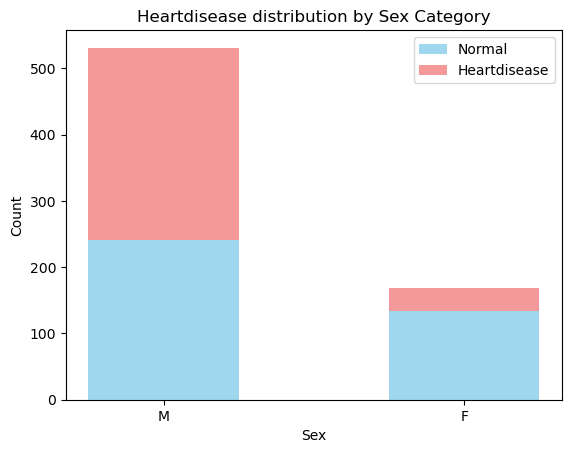

In [26]:
# Analyze the distribution of heartdisease by sex category
categories = ['M', 'F'] 
x = df["Sex"]

hd_count = df[df['HeartDisease'] == 1]['Sex'].value_counts() 
no_hd_count = df[df['HeartDisease'] == 0]['Sex'].value_counts()

plt.bar(categories, no_hd_count, color='skyblue', alpha=0.8, width=0.5, label='Normal')
plt.bar(categories, hd_count, bottom=no_hd_count, color='lightcoral', alpha=0.8, width=0.5, label='Heartdisease')

plt.xlabel('Sex')
plt.ylabel('Count')
plt.title('Heartdisease distribution by Sex Category')

plt.legend()
plt.show()

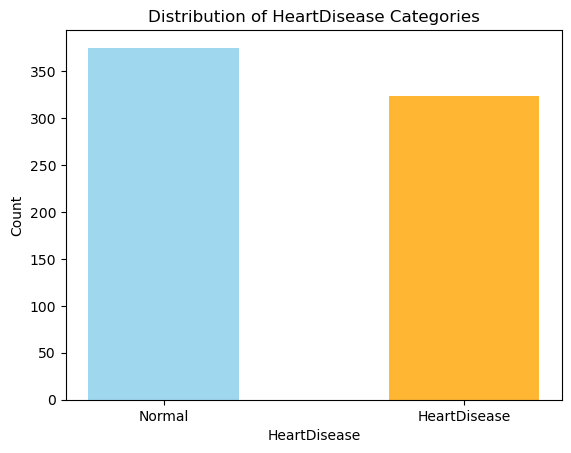

In [27]:
# Analyze the distribution of heartdisease categories
# TODO
HeartDisease = ['Normal', 'HeartDisease'] 
x = df["HeartDisease"]

normal = df[df['HeartDisease'] == 0]['HeartDisease'].count()
Heartdisease = df[df['HeartDisease'] == 1]['HeartDisease'].count()

plt.bar(HeartDisease, [normal, Heartdisease], color=['skyblue', 'orange'], alpha=0.8, width=0.5)

plt.xlabel('HeartDisease')
plt.ylabel('Count')
plt.title('Distribution of HeartDisease Categories')

plt.show()


### 4. Feature Engineering:

- Encode categorical variables using Dummy Encoding.

In [28]:
# Convert categorical variables into a suitable format for analysis
# Encode these columns: ['Sex', 'ChestPainType', 'FastingBS', 'RestingECG', 'ExerciseAngina', 'ST_Slope', 'BodyWeightCategory']
# TODO
df = pd.get_dummies(df, columns=['Sex', 'ChestPainType', 'FastingBS', 'RestingECG', 'ExerciseAngina', 'ST_Slope', 'BodyWeightCategory'], dtype='int',)


In [29]:
df.head()

,Age,RestingBP,Cholesterol,MaxHR,Oldpeak,GeneticMarker1,GeneticMarker2,HeartDisease,Sex_F,Sex_M,...,RestingECG_ST,ExerciseAngina_N,ExerciseAngina_Y,ST_Slope_Down,ST_Slope_Flat,ST_Slope_Up,BodyWeightCategory_Normal,BodyWeightCategory_Obese,BodyWeightCategory_Overweight,BodyWeightCategory_Underweight
0,40,141,289,173,0.0,0.046501,11560,0,0,1,...,0,1,0,0,0,1,1,0,0,0
1,49,158,175,151,1.0,0.619699,8575,1,1,0,...,0,1,0,0,1,0,0,0,1,0
2,37,135,285,97,0.0,0.561993,10545,0,0,1,...,1,1,0,0,0,1,0,0,1,0
3,48,140,214,112,1.5,0.345920,10272,1,1,0,...,0,0,1,0,1,0,0,1,0,0
4,54,149,192,124,0.0,0.315190,10368,0,0,1,...,0,1,0,0,0,1,0,0,0,1


In [30]:
#overview of all the columns 
df.columns

Index(['Age', 'RestingBP', 'Cholesterol', 'MaxHR', 'Oldpeak', 'GeneticMarker1',
       'GeneticMarker2', 'HeartDisease', 'Sex_F', 'Sex_M', 'ChestPainType_ASY',
       'ChestPainType_ATA', 'ChestPainType_NAP', 'ChestPainType_TA',
       'FastingBS_0', 'FastingBS_1', 'RestingECG_LVH', 'RestingECG_Normal',
       'RestingECG_ST', 'ExerciseAngina_N', 'ExerciseAngina_Y',
       'ST_Slope_Down', 'ST_Slope_Flat', 'ST_Slope_Up',
       'BodyWeightCategory_Normal', 'BodyWeightCategory_Obese',
       'BodyWeightCategory_Overweight', 'BodyWeightCategory_Underweight'],
      dtype='object')

### 5. Model Training:

- Import necessary libraries for model training and evaluation
- Split the dataset into training and testing sets.
- Consulting the scikit-learn map and it says to try LinearSVC
- Evaluate the performance of the models using accuracy.

In [33]:
# Import necessary libraries for model training
# import Ml algorithms 
from sklearn.svm import LinearSVC
#import for training and testing
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Split the dataset into features (X) and target variable (y)
X = df.drop('HeartDisease', axis=1)
y = df['HeartDisease']

# Split the data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# instantiate LinearSVC
clf = LinearSVC(max_iter=10000, dual=False)
clf.fit(x_train, y_train)

# Make prediciton on the test set
clf_predictions = clf.predict(x_test)

# Evaluate the LinearSVC
clf_evaluate = accuracy_score(y_test, clf_predictions)
print(f'Accuracy with trimmed outliers: {clf_evaluate}')
print(f'Accuracy with raw data: 0.8586956521739131')

Accuracy with trimmed outliers: 0.8428571428571429
Accuracy with raw data: 0.8586956521739131


In [34]:
# Try RandomForestClassifier estimator class
from sklearn.ensemble import RandomForestClassifier

# Train a Random Forest classifier
rfc = RandomForestClassifier()
rfc.fit(x_train, y_train)

# Make predictions on the test set
rfc_predictions = rfc.predict(x_test)

# Evaluate the performance of the model using accuracy
rfc_evaluate = accuracy_score(y_test, rfc_predictions)
print(f'Accuracy with trimmed outliers: {rfc_evaluate}')
print(f'Accuracy with raw data: 0.875')

Accuracy with trimmed outliers: 0.85
Accuracy with raw data: 0.875


I checked what the accuracy was before trimming the outliers and after trimming the oultiers. 